In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
con = sqlite3.connect(r'D:\MachineLearning\Project\Amazon_datesets/database.sqlite')

In [3]:
type(con)

sqlite3.Connection

In [4]:
df=pd.read_sql_query('SELECT * FROM Reviews',con)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df['Time'].dtype

dtype('int64')

### Data Preparation

In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
# Remove Invail row if HelpfulnessNumerator > HelpfulnessDenominator
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [12]:
df_valid.shape

(568452, 10)

In [13]:
## Removinf Duplicated row
df_valid.duplicated(['UserId', 'ProfileName','Time','Text']).sum()

np.int64(174521)

In [14]:
data=df_valid.drop_duplicates(subset=['UserId', 'ProfileName','Time','Text'])

In [15]:
data.shape

(393931, 10)

In [16]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [17]:
data['Time'] = pd.to_datetime(data['Time'],unit='s')

C:\Users\fszik\AppData\Local\Temp\ipykernel_14840\3345079465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'],unit='s')


In [18]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

### Analyze to what user Amazon recommend more products?

In [19]:
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393931 non-null  int64         
 1   ProductId               393931 non-null  object        
 2   UserId                  393931 non-null  object        
 3   ProfileName             393931 non-null  object        
 4   HelpfulnessNumerator    393931 non-null  int64         
 5   HelpfulnessDenominator  393931 non-null  int64         
 6   Score                   393931 non-null  int64         
 7   Time                    393931 non-null  datetime64[ns]
 8   Summary                 393931 non-null  object        
 9   Text                    393931 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 33.1+ MB


In [21]:
data['ProfileName'].nunique()

218418

In [22]:
data['UserId'].nunique()

256059

In [23]:
recomended_df=data.groupby('UserId').agg({'Summary':'count','Text':'count','Score': 'mean','ProductId':'count'}).sort_values(by='ProductId', ascending=False)

In [24]:
recomended_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [25]:
recomended_df['ProductId'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

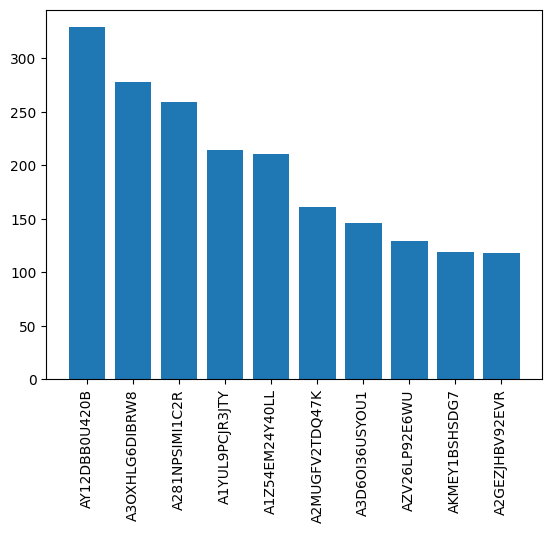

In [26]:
plt.bar(recomended_df.index[0:10],recomended_df['ProductId'][0:10].values)
plt.xticks(rotation=90)

### Which product has good number of reviews?

In [27]:
recomended_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393931 non-null  int64         
 1   ProductId               393931 non-null  object        
 2   UserId                  393931 non-null  object        
 3   ProfileName             393931 non-null  object        
 4   HelpfulnessNumerator    393931 non-null  int64         
 5   HelpfulnessDenominator  393931 non-null  int64         
 6   Score                   393931 non-null  int64         
 7   Time                    393931 non-null  datetime64[ns]
 8   Summary                 393931 non-null  object        
 9   Text                    393931 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 33.1+ MB


In [29]:
data['ProductId'].nunique()

67624

In [30]:
sold_products = data['ProductId'].value_counts().to_frame()

In [31]:
# Find the most frequently sold products here the thershold is 500 times
freq_sold_product=sold_products[sold_products['count'] > 500]

In [32]:
freq_sold_product

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [33]:
freq_sold_product_ids = freq_sold_product.index

In [34]:
freq_sold_product_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [35]:
freq_sold_product_df=data[data['ProductId'].isin(freq_sold_product_ids)]

<Axes: xlabel='count', ylabel='ProductId'>

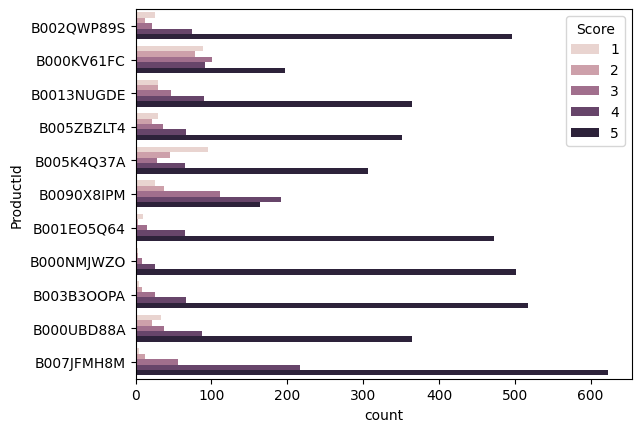

In [36]:
sns.countplot(y='ProductId', data=freq_sold_product_df,hue='Score')

### Is there any difference between the frequency and the not freduent viewers?

In [37]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
data.shape

(393931, 10)

In [39]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [50]:
x=data['UserId'].value_counts()

In [52]:
data['Viewer_type']=data['UserId'].apply(lambda user : 'Frequent' if x[user]>50 else 'Not Frequent')

C:\Users\fszik\AppData\Local\Temp\ipykernel_14840\532631610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Viewer_type']=data['UserId'].apply(lambda user : 'Frequent' if x[user]>50 else 'Not Frequent')


In [53]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [54]:
freq_viewers=data[data['Viewer_type'] == 'Frequent']

In [55]:
non_freq_viewers=data[data['Viewer_type'] == 'Not Frequent']

<Axes: xlabel='Score'>

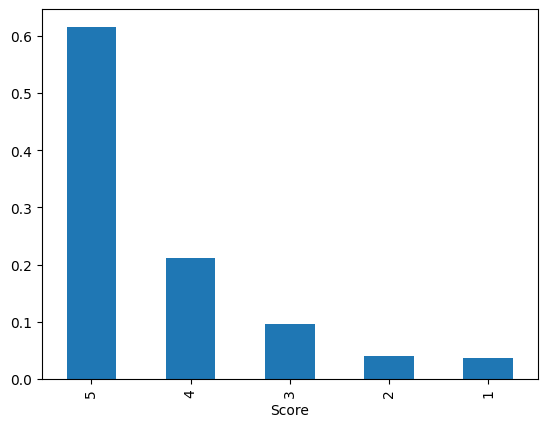

In [73]:
(freq_viewers['Score'].value_counts()/len(freq_viewers)).plot(kind='bar')

<Axes: xlabel='Score'>

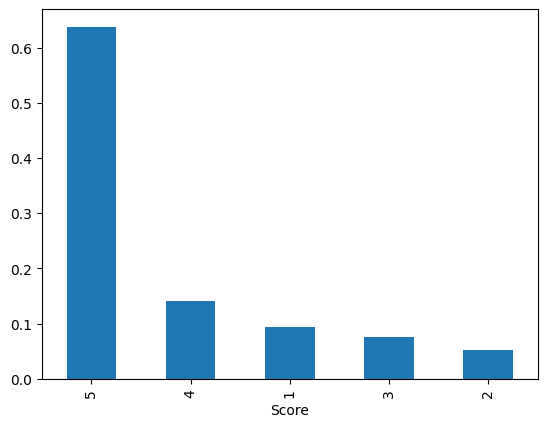

In [74]:
(non_freq_viewers['Score'].value_counts()/len(non_freq_viewers)).plot(kind='bar')

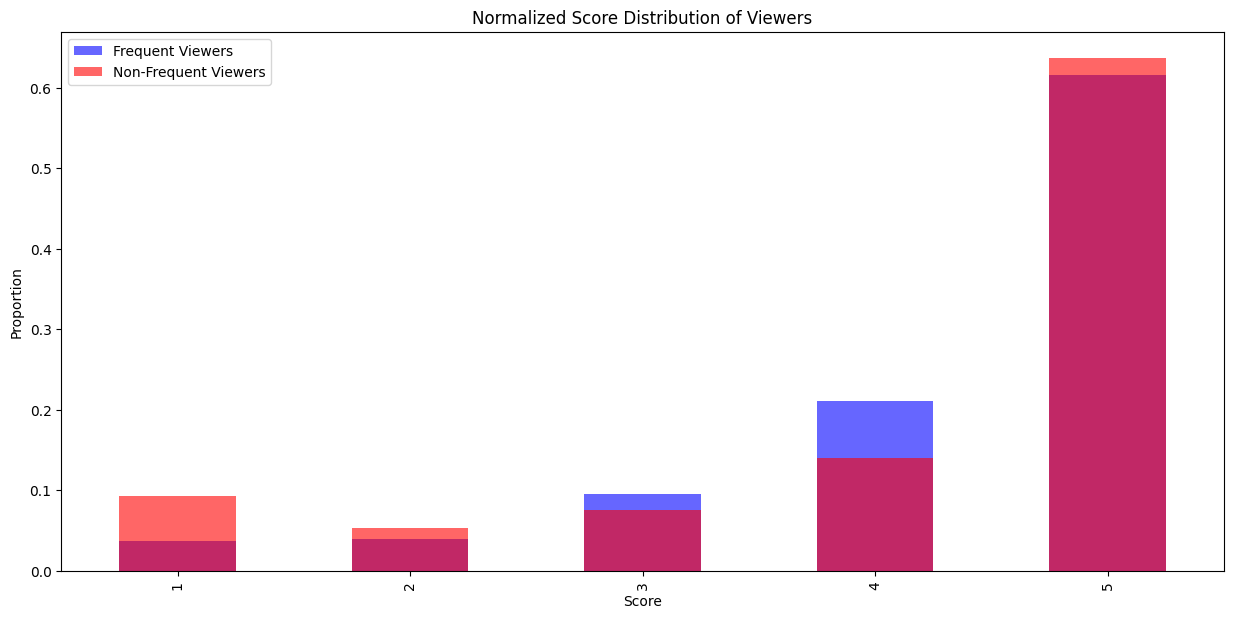

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Normalize the counts
freq_norm = freq_viewers['Score'].value_counts(normalize=True).sort_index()
non_freq_norm = non_freq_viewers['Score'].value_counts(normalize=True).sort_index()

# Plot both distributions
freq_norm.plot(kind='bar', alpha=0.6, color='blue', label='Frequent Viewers')
non_freq_norm.plot(kind='bar', alpha=0.6, color='red', label='Non-Frequent Viewers')

plt.xlabel("Score")
plt.ylabel("Proportion")
plt.title("Normalized Score Distribution of Viewers")
plt.legend()
plt.show()


### Are frequent viewers more verbose?

In [78]:
len(data['Text'][0])

263

In [79]:
def text_lenght(text):
    return len(text.split(' '))

In [81]:
data['Text_lenght']=data['Text'].apply(text_lenght)

C:\Users\fszik\AppData\Local\Temp\ipykernel_14840\107804362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_lenght']=data['Text'].apply(text_lenght)


In [82]:
data['Text_lenght']

0         49
1         31
2         99
3         43
4         30
          ..
568449    26
568450    46
568451    71
568452    37
568453    21
Name: Text_lenght, Length: 393931, dtype: int64

In [84]:
freq_viewers_text=data[data['Viewer_type'] == 'Frequent']
non_freq_viewers_text=data[data['Viewer_type'] == 'Not Frequent']

(0.0, 1000.0)

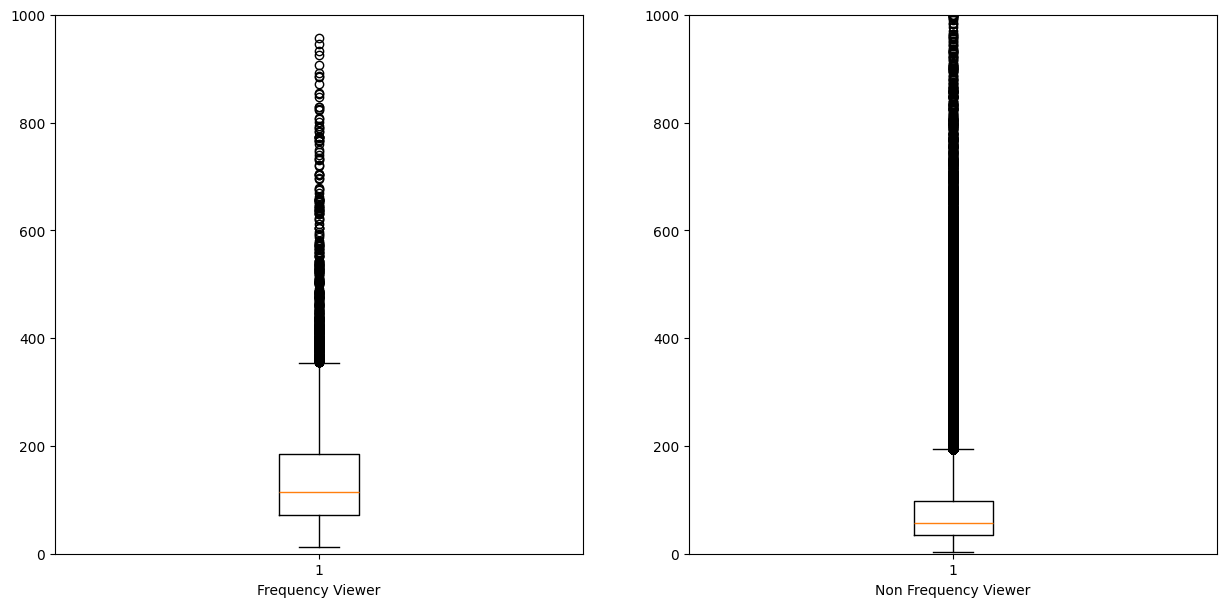

In [86]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(121)
ax1.boxplot(freq_viewers_text['Text_lenght'])
ax1.set_xlabel('Frequency Viewer')
ax1.set_ylim(0,1000)

ax2 = fig.add_subplot(122)
ax2.boxplot(non_freq_viewers_text['Text_lenght'])
ax2.set_xlabel('Non Frequency Viewer')
ax2.set_ylim(0,1000)

### Performance sentiment analysis on Data

In [87]:
! pip install cufflinks

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -

ERROR: Exception:
Traceback (most recent call last):
  File "D:\MachineLearning\myenv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "D:\MachineLearning\myenv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "D:\MachineLearning\myenv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "D:\MachineLearning\myenv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\socket.py", line 720, in readinto
    return self._sock.recv_into(b)
        

In [89]:
! pip install normalizer

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
  Created wheel for normalizer: filename=normalizer-0.2.1-py3-none-any.whl size=3793 sha256=f10a31555ec92c55c706cac9ebfdff9565c0ced1d3af17bd1d4bf0f591092921
  Stored in directory: c:\users\fszik\appdata\local\pip\cache\wheels\88\ed\80\2dcc547fc3ca3d4d5eff774cb7145f54f137dcad136c23e389
Successfully built normalizer


In [91]:
! pip install textblob

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 860.9 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 988.0 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 987.4 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 959.3 kB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 k

In [92]:
from textblob import TextBlob

In [94]:
data['Summary'][0]

'Good Quality Dog Food'

In [97]:
TextBlob(data['Summary'][0]).sentiment.polarity

0.7

In [98]:
sample_data = data[0:50000]

In [99]:
polarity = []

for text in sample_data['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [100]:
len(polarity)

50000

In [101]:
sample_data['Polarity'] = polarity

C:\Users\fszik\AppData\Local\Temp\ipykernel_14840\1572289958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Polarity'] = polarity


In [103]:
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type,Text_lenght,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [105]:
polarity_negative=sample_data[sample_data['Polarity'] <0]
polarity_positive=sample_data[sample_data['Polarity'] >0]

In [106]:
from collections import Counter

In [108]:
Counter(polarity_negative['Summary']).most_common(10)

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [109]:
Counter(polarity_positive['Summary']).most_common(10)

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]